In [1]:
# import here
import os
import PIL
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torch.utils.data.sampler as sampler
from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
from pathlib import Path
import matplotlib
import matplotlib.pyplot as pp

---
# Load The Data

In [4]:
#in_feature = np.load(str("/dataset/nuScenes/FeatureExtracted2/v1.0-mini/in_feature/00000.npy"))
in_feature = np.load(str("/dataset/nuScenes/FeatureExtracted2/v1.0-mini/in_feature/00000.npy"))
#in_feature = in_feature.transpose(1,2,0)
#in_feature = np.load(str("/dataset/nuScenes/FeatureExtracted/v1.0-trainval/in_feature/00000.npy"))
in_feature = in_feature.astype(np.float32)
print("Input feature read done!!!")

out_feature = np.load(str("/dataset/nuScenes/FeatureExtracted/v1.0-trainval/out_feature/00000.npy"))
out_feature = out_feature.astype(np.float32)
print("Output feature read done!!!")

Input feature read done!!!
Output feature read done!!!


(864, 864, 4)


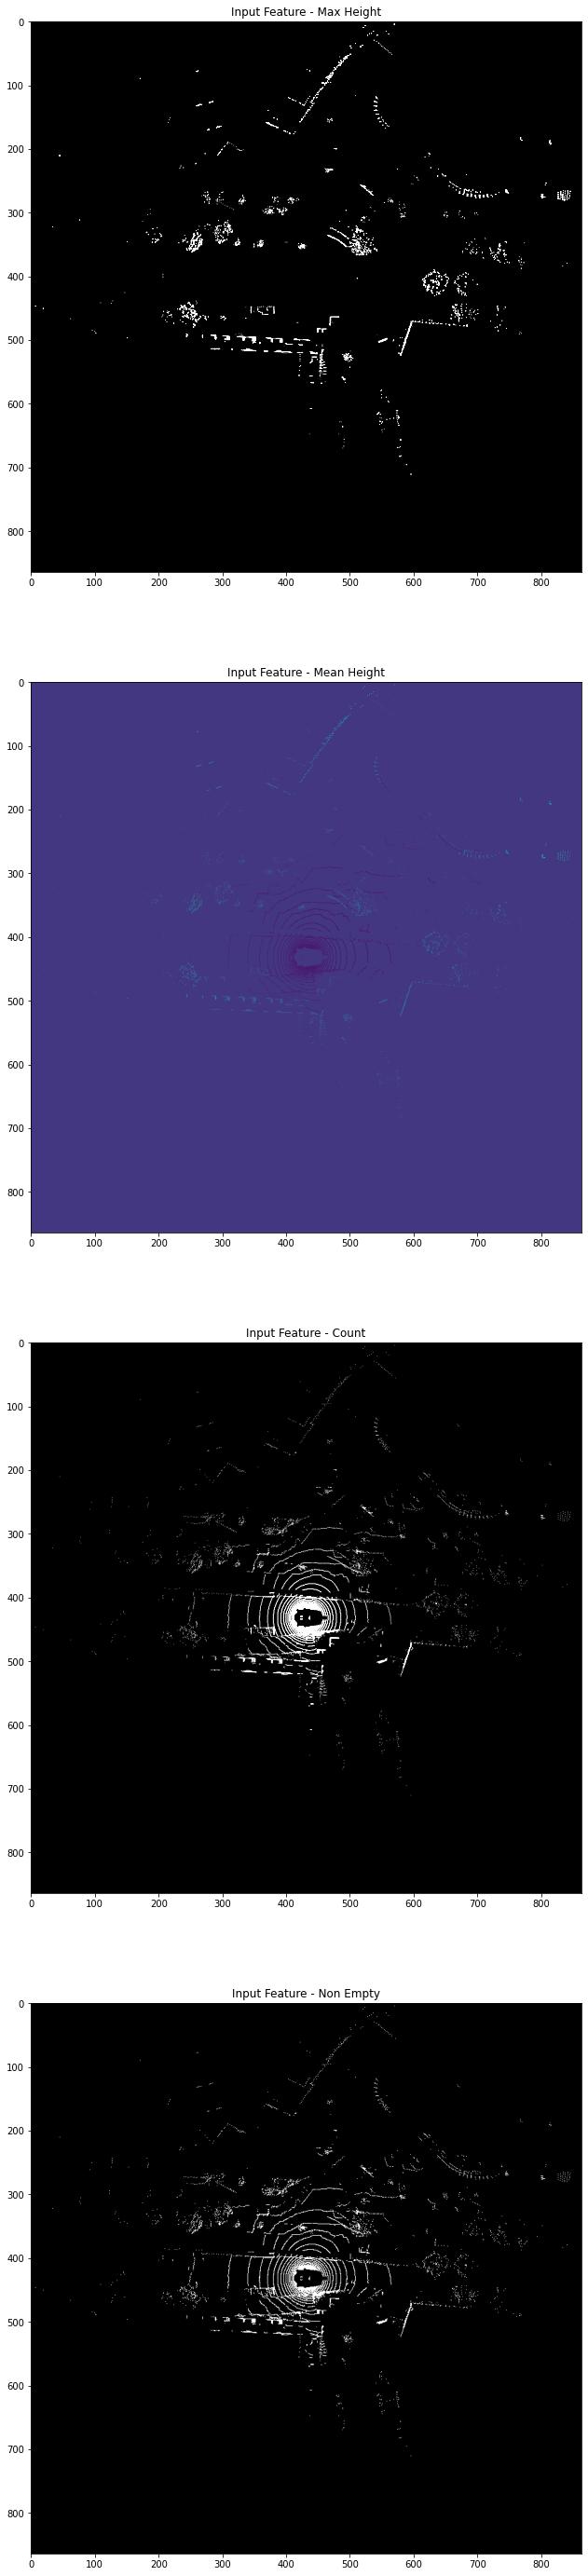

In [5]:
#in_feature_non_empty = np.where(in_feature[:,:,3]>0)

in_feature_maxheight = in_feature[:,:,0:1] * 255
in_feature_meanheight = in_feature[:,:,1:2] * 255
in_feature_count = in_feature[:,:,2:3] * 255
in_feature_nonempty = in_feature[:,:,3:4] * 255

print(in_feature.shape)

f, axarr = plt.subplots(4, figsize=(50,50))
axarr[0].set_title("Input Feature - Max Height")
axarr[0].imshow(in_feature_maxheight,cmap='gray', vmin=0, vmax=255)

axarr[1].set_title("Input Feature - Mean Height")
axarr[1].imshow(in_feature_meanheight)

axarr[2].set_title("Input Feature - Count")
axarr[2].imshow(in_feature_count,cmap='gray', vmin=0, vmax=255)

axarr[3].set_title("Input Feature - Non Empty")
axarr[3].imshow(in_feature_nonempty,cmap='gray', vmin=0, vmax=255)

<function matplotlib.pyplot.show(close=None, block=None)>

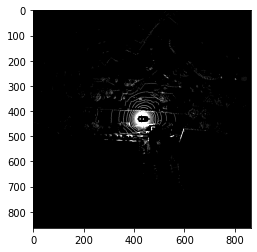

In [6]:
pp.imshow(in_feature_maxheight,cmap='gray', vmin=0, vmax=255)
pp.show
pp.imshow(in_feature_count,cmap='gray', vmin=0, vmax=255)
pp.show

(864, 864, 8)


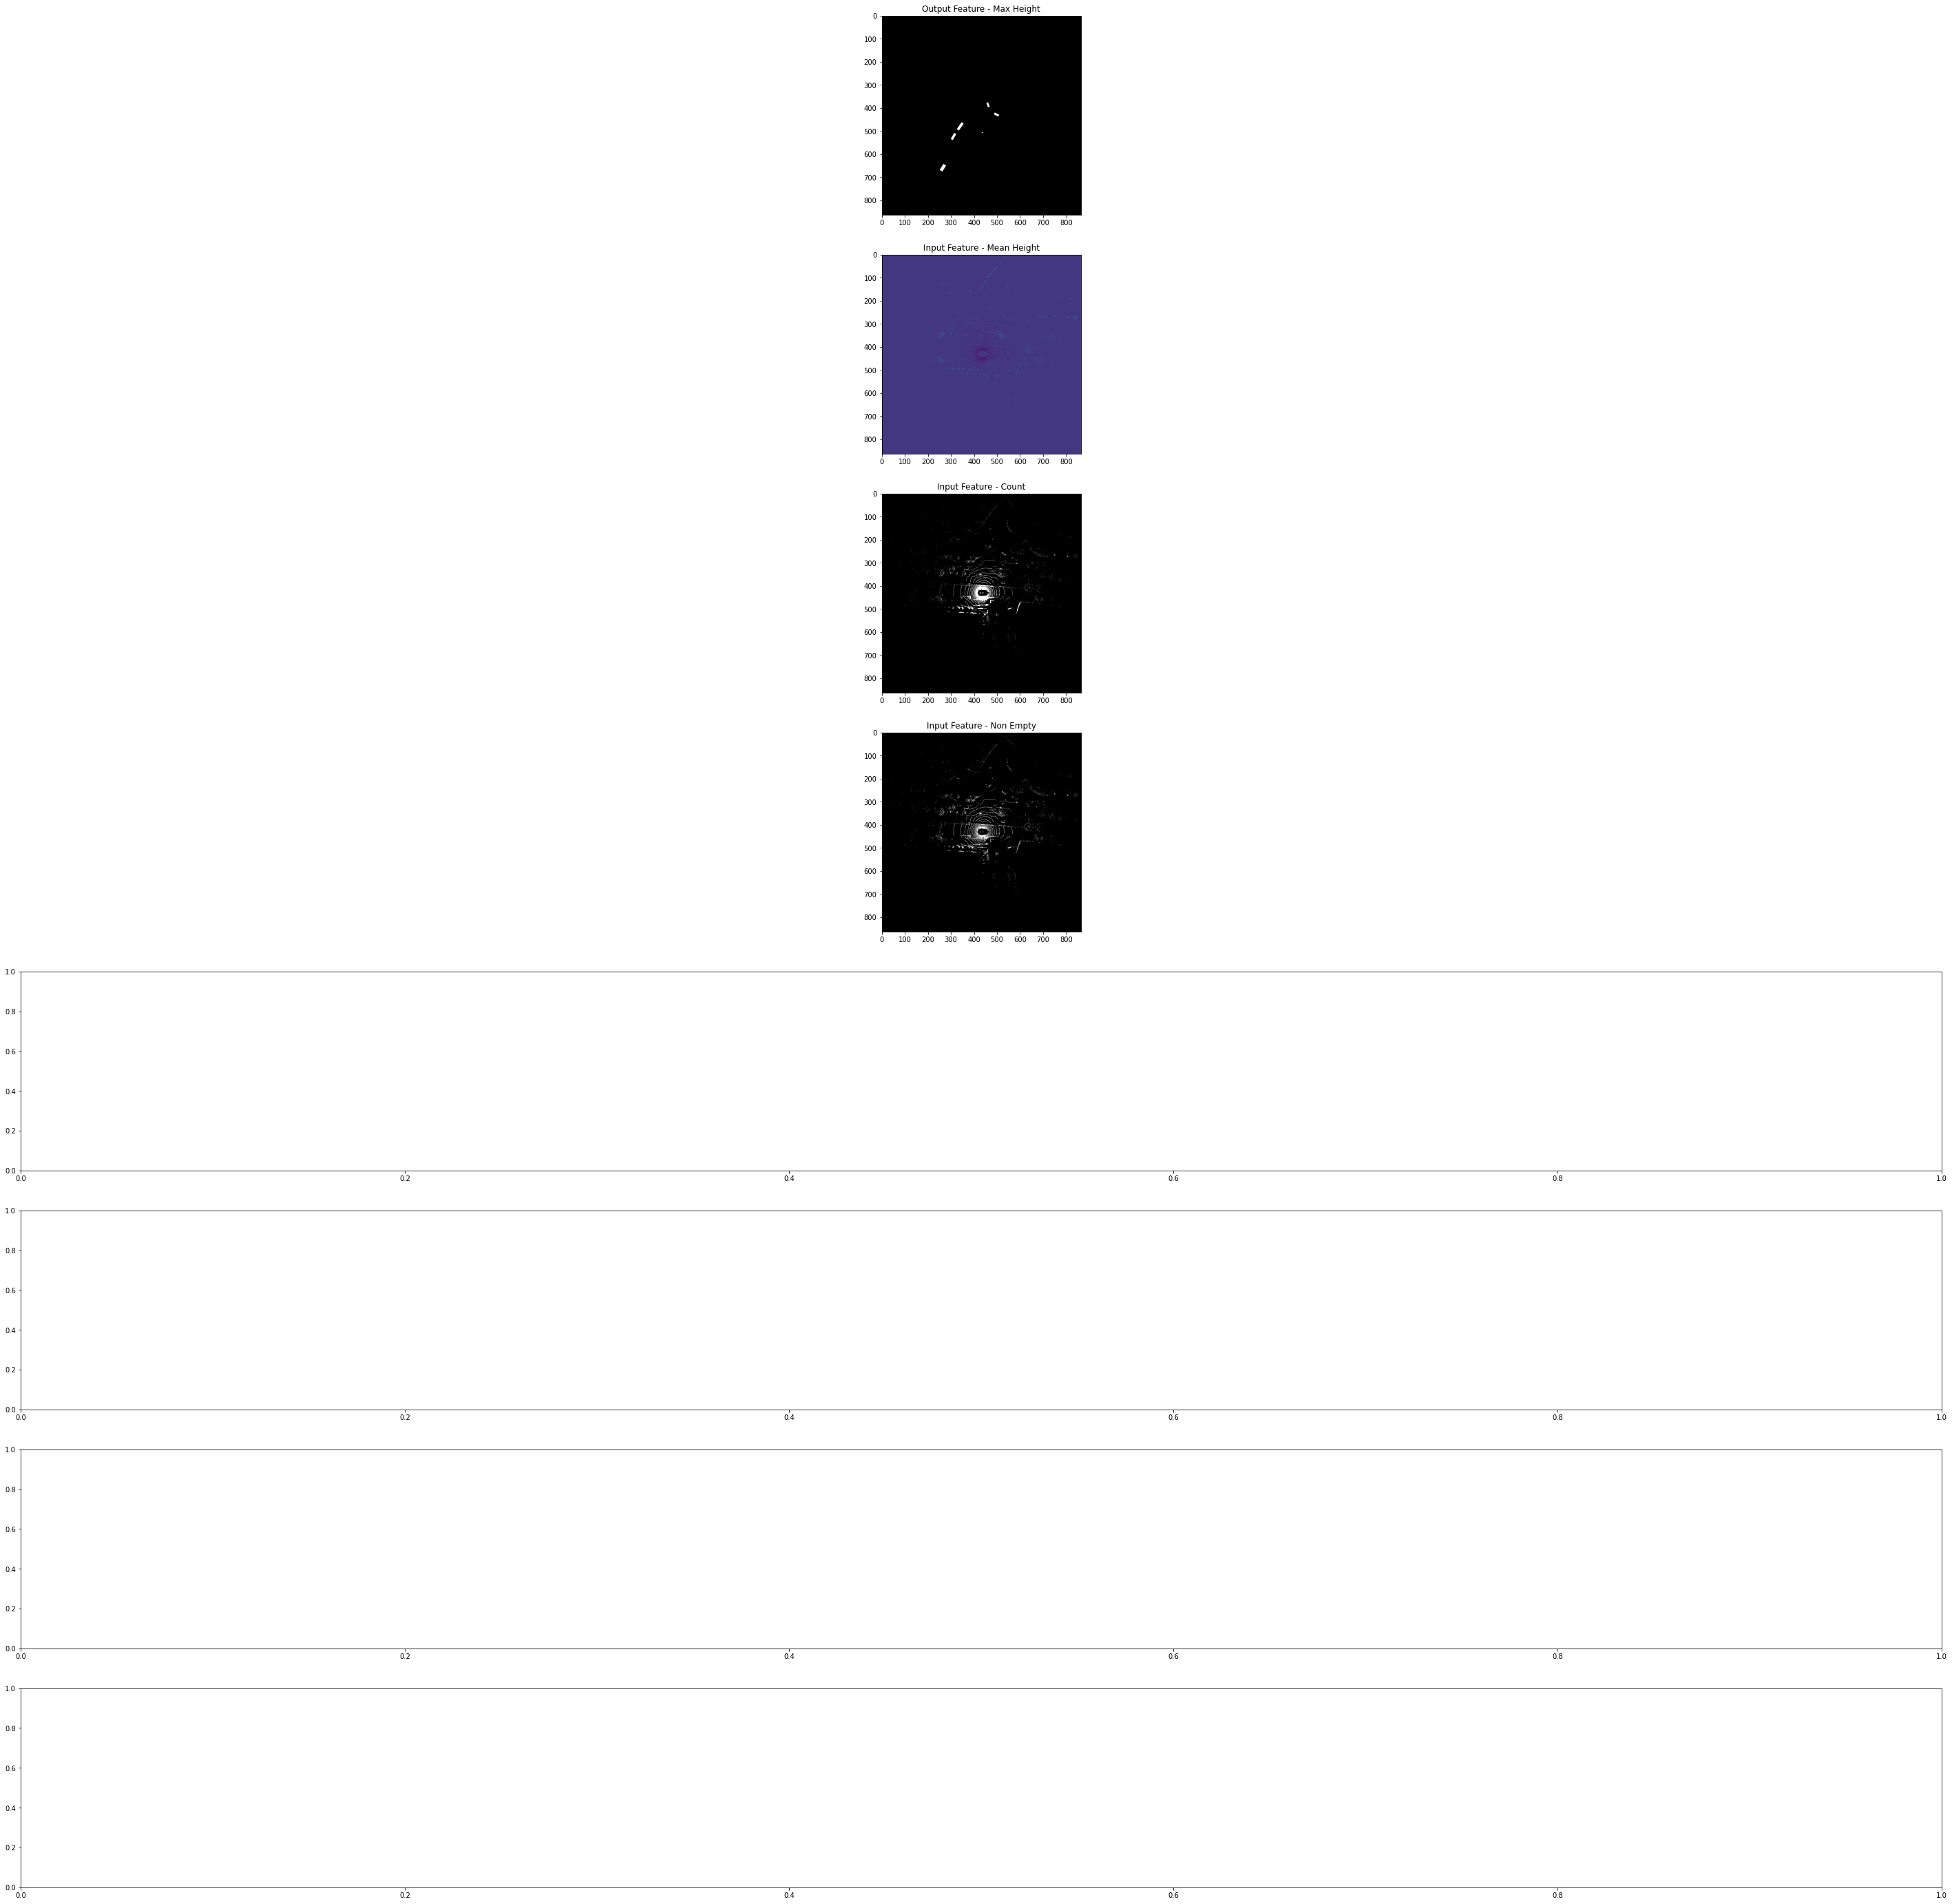

In [7]:
print(out_feature.shape)

f, axarr = plt.subplots(8, figsize=(50,50))
axarr[0].set_title("Output Feature - Max Height")
axarr[0].imshow(out_feature[:,:,0]*255,cmap='gray', vmin=0, vmax=255)

axarr[1].set_title("Input Feature - Mean Height")
axarr[1].imshow(in_feature_meanheight)

axarr[2].set_title("Input Feature - Count")
axarr[2].imshow(in_feature_count,cmap='gray', vmin=0, vmax=255)

axarr[3].set_title("Input Feature - Non Empty")
axarr[3].imshow(in_feature_nonempty,cmap='gray', vmin=0, vmax=255)